<a href="https://colab.research.google.com/github/NVishnevskaya/dano_hackaton/blob/main/productive_employees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np

In [ ]:
prod = pd.read_csv('NEW Как зарабатывают бобров КРОК.csv', delimiter = ';')
staff = pd.read_excel('Список сотрудников КРОК.xlsx')
purchases = pd.read_csv('Покупки сотрудников в боброшопе.csv', delimiter = ';')
main_missions = pd.read_csv('counted_missions.csv', delimiter = ',')
# Create a new row as a Series and append it to the DataFrame
new_row = pd.Series(['NaN',600, 'Миссия Best Hunter'], index=main_missions.columns)
# Assuming your columns are named appropriately, if not adjust 'index' accordingly
main_missions = pd.concat([main_missions, new_row.to_frame().T], ignore_index=True)

main_missions = main_missions.drop(['Unnamed: 0'], axis=1)
main_missions.loc[33, 'Сумма вознаграждения'] = 500
main_missions.loc[32, 'Сумма вознаграждения'] = 700
print(main_missions)
main_missions = main_missions['Название миссии']

   Сумма вознаграждения                                    Название миссии
0                 800.0                      Best Hunter (Вакансия месяца)
1                 700.0                                   Креативный класс
2                 600.0                                Звезда департамента
3                 600.0                                        Best Hunter
4                 550.0                                              HiPro
5                 550.0                                               HiPo
6                 500.0                                          Наставник
7                 400.0                 Ты провел цикл внутренних обучений
8                 400.0                        Победитель Managers' fights
9                 350.0  Ты помог нам организовать мероприятие для проф...
10                350.0       Ты прошел программу адаптации для аналитиков
11                300.0                                             Ментор
12                300.0  

In [ ]:
data = prod[prod['Название миссии'].isin(main_missions)]
start_date = pd.to_datetime('2024-01-01')
end_date = pd.to_datetime('2024-11-01')
data.loc[:, 'Дата'] = data['Дата'].astype('datetime64[ns]')
filtered_data = data[(data['Дата'] >= start_date) & (data['Дата'] <= end_date)]
clean_data = filtered_data.drop(['Дата', 'Департамент', 'Контейнер', 'Комментарий'], axis=1)

In [ ]:
for index, row in clean_data.iterrows():
    if row['Сумма вознаграждения'] == 'NaN':
        if row['Название миссии'] == 'Миссия Креативный класс':
            clean_data.loc[index, 'Сумма вознаграждения'] = 700
        elif row['Название миссии'] == 'Миссия Best Hunter':
            clean_data.loc[index, 'Сумма вознаграждения'] = 600
        elif row['Название миссии'] == 'Тренер':
            clean_data.loc[index, 'Сумма вознаграждения'] = 500
        else:
            clean_data.loc[index, 'Сумма вознаграждения'] = 0

In [ ]:
clean_data = clean_data.groupby('Код сотрудника').sum()
productivity_per_worker = clean_data.drop('Название миссии', axis=1)
productivity_per_worker

,Сумма вознаграждения
Код сотрудника,
SU100026,500.0
SU100135,1320.0
SU100238,600.0
SU100262,3170.0
SU100384,700.0
...,...
SU99835,1650.0
SU99836,1100.0
SU99959,600.0


In [ ]:
prods = productivity_per_worker.reset_index()
prods

,Код сотрудника,Сумма вознаграждения
0,SU100026,500.0
1,SU100135,1320.0
2,SU100238,600.0
3,SU100262,3170.0
4,SU100384,700.0
...,...,...
2850,SU99835,1650.0
2851,SU99836,1100.0
2852,SU99959,600.0
2853,SU99962,300.0


In [ ]:
prods.describe()

,Сумма вознаграждения
count,2855.000000
mean,1018.725044
std,823.487116
min,0.000000
25%,350.000000
50%,820.000000
75%,1500.000000
max,6150.000000


In [ ]:
prods['Сумма вознаграждения'].median()

820.0

In [ ]:
def define_group(x):
    if x < np.percentile(prods["Сумма вознаграждения"], 25):
        return "< 25"
    elif x > np.percentile(prods["Сумма вознаграждения"], 75):
        return "> 75"
    elif np.percentile(prods["Сумма вознаграждения"], 50) < x < np.percentile(prods["Сумма вознаграждения"], 75):
        return "50 < x < 75"
    return "25 < x < 50"


prods["группа"] = prods["Сумма вознаграждения"].apply(define_group)

<Axes: title={'center': 'Группа продуктивости'}>

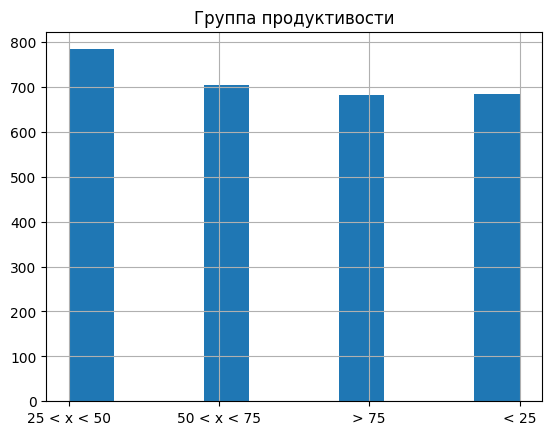

In [ ]:
plt.title("Группа продуктивости")
prods["группа"].hist()

In [ ]:
productive_people_more_50 = prods[prods["Сумма вознаграждения"] > np.percentile(prods["Сумма вознаграждения"], 50)]
print(productive_people_more_50)
productive_people_more_50.to_csv("prod_more_50.csv")


     Код сотрудника  Сумма вознаграждения       группа
1          SU100135                1320.0  50 < x < 75
3          SU100262                3170.0         > 75
5          SU100415                1800.0         > 75
6          SU100524                1750.0         > 75
9          SU101039                2300.0         > 75
...             ...                   ...          ...
2845        SU99066                2200.0         > 75
2847        SU99248                2300.0         > 75
2850        SU99835                1650.0         > 75
2851        SU99836                1100.0  50 < x < 75
2854        SU99997                2500.0         > 75

[1423 rows x 3 columns]


In [ ]:
productive_people_more_75 = prods[prods["Сумма вознаграждения"] > np.percentile(prods["Сумма вознаграждения"], 75)]
productive_people_more_75.to_csv("prod_more_75.csv")
productive_people_more_75

,Код сотрудника,Сумма вознаграждения,группа
3,SU100262,3170.0,> 75
5,SU100415,1800.0,> 75
6,SU100524,1750.0,> 75
9,SU101039,2300.0,> 75
10,SU101059,1650.0,> 75
...,...,...,...
2836,SU97156,2320.0,> 75
2845,SU99066,2200.0,> 75
2847,SU99248,2300.0,> 75
2850,SU99835,1650.0,> 75


In [ ]:
data1 = prod[prod['Код сотрудника'].isin(productive_people_more_75["Код сотрудника"])]
data1.to_csv("prod_как_зарабатывают_бобров.csv")
data2 = staff[staff['Внешний код'].isin(productive_people_more_75["Код сотрудника"])]
data2.to_csv("prod_список_сотрудников.csv")
print(data2)
data3 = purchases[purchases['Код сотрудника'].isin(productive_people_more_75["Код сотрудника"])]
data3.to_csv('prod_покупки.csv')


     Внешний код                                Факт. департамент  \
0       SU181063             Департамент внутренней автоматизации   
1       SU198055  Департамент разработки программного обеспечения   
4       SU160331  Департамент разработки программного обеспечения   
27      SU196835        Департамент продаж и менеджмента проектов   
29      SU168524                    Департамент бизнес-приложений   
...          ...                                              ...   
3257    SU139832   Департамент инженерных и мультимедийных систем   
3267    SU154115     Административно-эксплуатационный департамент   
3275     SU84223             Департамент внутренней автоматизации   
3278     SU48062                           Финансовый департамент   
3298    SU109788  Департамент разработки программного обеспечения   

                                    Факт. подразделение  \
0                                                   NaN   
1                Государственные информационные систе